In [5]:
import torch

a= torch.dot(torch.tensor([2,3]),torch.tensor([2,1]))
torch.bmm(torch.FloatTensor(10,3,5),torch.FloatTensor(10,5,3)).size()

torch.Size([10, 3, 3])

In [5]:
import numpy as np
data=np.load("../data/cats/fid_files/cats_64.npz")

In [23]:
data["m"].shape

(2048,)

In [14]:
import torch
import math
import numpy as np
def normalize_vecs(vectors: torch.Tensor) -> torch.Tensor:
    """
    Normalize vector lengths.
    """
    return vectors / (torch.norm(vectors, dim=-1, keepdim=True))

x, y = torch.meshgrid(torch.linspace(-1, 1, 8, ),
                          torch.linspace(-1, 1, 8))
x=x.T.flatten()
y=y.T.flatten()
z = -torch.ones_like(x) / np.tan((2 * math.pi * 30 / 360)/2)

ray_d_cam= normalize_vecs(torch.stack([x, y, z], -1))
ray_d_cam.shape


torch.Size([64, 3])

In [5]:
y

tensor([[-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000],
        [-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000],
        [-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000],
        [-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000],
        [-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000],
        [-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000],
        [-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000],
        [-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000]])

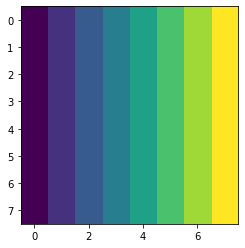

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x.T)

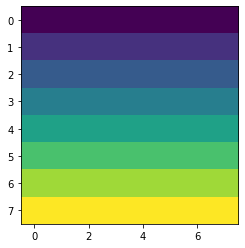

In [14]:
plt.imshow(y.T)

In [26]:
import math
import numpy as np
z=-torch.ones_like(x)/np.tan((2 * math.pi * 30 / 360)/2)

def normalize_vecs(vectors: torch.Tensor) -> torch.Tensor:
    """
    Normalize vector lengths.
    """
    return vectors / (torch.norm(vectors, dim=-1, keepdim=True))

normalize_vecs(torch.stack([x, y, z], -1))

tensor([[[-0.2506, -0.2506, -0.9351],
         [-0.2545, -0.1818, -0.9498],
         [-0.2572, -0.1102, -0.9600],
         [-0.2586, -0.0369, -0.9653],
         [-0.2586,  0.0369, -0.9653],
         [-0.2572,  0.1102, -0.9600],
         [-0.2545,  0.1818, -0.9498],
         [-0.2506,  0.2506, -0.9351]],

        [[-0.1818, -0.2545, -0.9498],
         [-0.1847, -0.1847, -0.9653],
         [-0.1868, -0.1121, -0.9760],
         [-0.1878, -0.0376, -0.9815],
         [-0.1878,  0.0376, -0.9815],
         [-0.1868,  0.1121, -0.9760],
         [-0.1847,  0.1847, -0.9653],
         [-0.1818,  0.2545, -0.9498]],

        [[-0.1102, -0.2572, -0.9600],
         [-0.1121, -0.1868, -0.9760],
         [-0.1134, -0.1134, -0.9871],
         [-0.1140, -0.0380, -0.9928],
         [-0.1140,  0.0380, -0.9928],
         [-0.1134,  0.1134, -0.9871],
         [-0.1121,  0.1868, -0.9760],
         [-0.1102,  0.2572, -0.9600]],

        [[-0.0369, -0.2586, -0.9653],
         [-0.0376, -0.1878, -0.9815],
      

In [25]:
torch.stack([x,y,z],-1)

tensor([[[-1.0000, -1.0000, -3.7321],
         [-1.0000, -0.7143, -3.7321],
         [-1.0000, -0.4286, -3.7321],
         [-1.0000, -0.1429, -3.7321],
         [-1.0000,  0.1429, -3.7321],
         [-1.0000,  0.4286, -3.7321],
         [-1.0000,  0.7143, -3.7321],
         [-1.0000,  1.0000, -3.7321]],

        [[-0.7143, -1.0000, -3.7321],
         [-0.7143, -0.7143, -3.7321],
         [-0.7143, -0.4286, -3.7321],
         [-0.7143, -0.1429, -3.7321],
         [-0.7143,  0.1429, -3.7321],
         [-0.7143,  0.4286, -3.7321],
         [-0.7143,  0.7143, -3.7321],
         [-0.7143,  1.0000, -3.7321]],

        [[-0.4286, -1.0000, -3.7321],
         [-0.4286, -0.7143, -3.7321],
         [-0.4286, -0.4286, -3.7321],
         [-0.4286, -0.1429, -3.7321],
         [-0.4286,  0.1429, -3.7321],
         [-0.4286,  0.4286, -3.7321],
         [-0.4286,  0.7143, -3.7321],
         [-0.4286,  1.0000, -3.7321]],

        [[-0.1429, -1.0000, -3.7321],
         [-0.1429, -0.7143, -3.7321],
      

In [16]:
def get_initial_rays_trig(n, num_steps, fov, resolution, ray_start, ray_end):
    """Returns sample points, z_vals, and ray directions in camera space."""

    W, H = resolution
    # Create full screen NDC (-1 to +1) coords [x, y, 0, 1].
    # Y is flipped to follow image memory layouts.
    x, y = torch.meshgrid(torch.linspace(-1, 1, W),
                          torch.linspace(1, -1, H, )) # x,y grid , it descrete -1 to 1 with W resolution
    x = x.T.flatten() # transform하면 적절하게 x좌표에 맞는다.
    y = y.T.flatten() #  transform하면 잘 맞는다.
    z = -torch.ones_like(x) / np.tan((2 * math.pi * fov / 360)/2) # 

    rays_d_cam = normalize_vecs(torch.stack([x, y, z], -1))


    z_vals = torch.linspace(ray_start, ray_end, num_steps).reshape(1, num_steps, 1).repeat(W*H, 1, 1)
    points = rays_d_cam.unsqueeze(1).repeat(1, num_steps, 1) * z_vals

    points = torch.stack(n*[points])
    z_vals = torch.stack(n*[z_vals])
    rays_d_cam = torch.stack(n*[rays_d_cam])

    return points, z_vals, rays_d_cam

points,z_vals,rays_d_cam=get_initial_rays_trig(1,1,30,(8,8),2,6)


In [19]:
points.shape,z_vals.shape,rays_d_cam.shape

(torch.Size([1, 64, 1, 3]), torch.Size([1, 64, 1, 1]), torch.Size([1, 64, 3]))